In [1]:
import random
import json
import pickle

import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import numpy as np
import speech_recognition as sr
import pyttsx3
import matplotlib.pyplot as plt

C:\python3.10.1\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
print('Please upload your image : ')

Please upload your image : 


In [3]:
import numpy as np
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt

1/1 [==============================] - 4s 4s/step


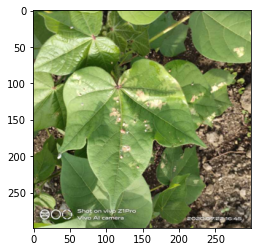

Your leaf is a  disease leaf


In [4]:
# Import necessary libraries


# Load the trained model
model = load_model('inception_model.h5')

# Set the path to the input image
img_path = 'diseaseleaf.jpg'

# Load the input image and preprocess it
img = Image.open(img_path).resize((299, 299))
x = np.array(img) / 255.0  # normalize the pixel values
x = np.expand_dims(x, axis=0)

# Predict the class label for the input image
pred = model.predict(x)
pred_class = np.argmax(pred, axis=1)

# Get the predicted class name
class_names = ['disease leaf', 'fresh leaf']  # replace with your class names
pred_class_name = class_names[pred_class[0]]

# Display the image
plt.imshow(img)
plt.show()

# Print the predicted class name
print("Your leaf is a ", pred_class_name)

In [15]:
chat()

ENTER -QUIT- TO END
1/1 [==============================] - 0s 46ms/step
Good evening! What brings you here today?
1/1 [==============================] - 0s 32ms/step
You can improve the fertility of your soil by adding organic matter such as compost, manure, or cover crops. You can also use fertilizers to supplement nutrients that are lacking in your soil.
1/1 [==============================] - 0s 31ms/step
The best irrigation method for your farm depends on factors such as your soil type, crop type, and water availability.


KeyboardInterrupt: 

CODE TO BE RUN BEFORE RUNNING CHATBOT

In [5]:
lemmatizer = WordNetLemmatizer()

intents = json.loads(open("intentsfarmers.json").read())

words=[]
tags=[]
documents=[]
#corpus=[]

ignore=["?", "!", ".", ","]

for i in intents['intents']:
    t=i['tag']
    if t not in tags:
        tags.append(t)
        
    w=i['patterns']
    for j in w:
        ws=nltk.word_tokenize(j)
        for k in ws:
            if (k not in ignore) and k not in words:
                words.append(lemmatizer.lemmatize(k))
        documents.append((ws, i['tag']))
                
    
                
words=sorted(words)
tags=sorted(tags)

  
    
    
    

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
datax=[]
datay=[]

for i in intents['intents']:
    w=i['patterns']
    
    for j in w:
        s=''
        temp=nltk.word_tokenize(j)
        for k in range(len(temp)):
            ws=lemmatizer.lemmatize(temp[k])
            ws=ws.lower()
            temp[k]=ws
        for m in temp:
            if m not in ignore:
                s=s+' '+m
            
        s=s.rstrip()
        s=s.lstrip()
        datax.append(s)
        temp=np.zeros(len(tags))
        temp[tags.index(i['tag'])]=1
        datay.append(temp)
        
            

In [8]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(datax)

In [9]:
datay=np.array(datay)
result=result.toarray()
datax=result

In [10]:
model=Sequential()
model.add(Dense(256,input_shape=(108,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(datay.shape[1], activation='softmax'))
 
 
sgd=SGD(learning_rate=0.01, decay=1e-6,
          momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])
 
history = model.fit(datax,datay,
                 epochs=200, batch_size=5, verbose=1)
 
model.save("chatbot.h5", history)
print("Done!")

Epoch 1/200
10/10 [==============================] - 1s 5ms/step - loss: 2.2875 - accuracy: 0.0851
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 2.2635 - accuracy: 0.1489
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 2.2655 - accuracy: 0.1489
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 2.2135 - accuracy: 0.2340
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 2.1977 - accuracy: 0.2553
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 2.1378 - accuracy: 0.2553
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 2.1258 - accuracy: 0.2340
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 2.0832 - accuracy: 0.3404
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 2.0906 - accuracy: 0.2766
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 2.0356 - accuracy: 0.3617
Epoch 11/

10/10 [==============================] - 0s 5ms/step - loss: 0.0630 - accuracy: 1.0000
Epoch 84/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 1.0000
Epoch 85/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0524 - accuracy: 1.0000
Epoch 86/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 87/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 1.0000
Epoch 88/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 1.0000
Epoch 89/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0265 - accuracy: 1.0000
Epoch 90/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 1.0000
Epoch 91/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 1.0000
Epoch 92/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 1.0000
Epoch 93/200


10/10 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 165/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 166/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 167/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 1.0000
Epoch 168/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 169/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 170/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 171/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 172/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 173/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0131 - accuracy: 1.0000
Epoc

In [11]:
def queryprocess(query):
    s=''
    for i in range(len(query)):
        q=query[i]
        q=lemmatizer.lemmatize(q)
        q=q.lower()
        if q not in ignore:
            s=s+' '+q
    s=s.lower()
    s=s.lstrip()
    s=s.rstrip()
    return s

In [12]:
def SpeakText(command):
    # Initialize the engine
    engine = pyttsx3.init()
    engine.say(command)
    engine.runAndWait()


In [13]:
def chat():
    
    r = sr.Recognizer()

    print('ENTER -QUIT- TO END')
    while True:
        try:
            # use the microphone as source for input.
            with sr.Microphone() as source2:

                # wait for a second to let the recognizer
                # adjust the energy threshold based on
                # the surrounding noise level
                r.adjust_for_ambient_noise(source2, duration=0.2)

                #listens for the user's input
                audio2 = r.listen(source2)

                # Using google to recognize audio
                query= r.recognize_google(audio2)
        except sr.RequestError as e:
                print("Could not request results; {0}".format(e))
                continue

        except sr.UnknownValueError:
                SpeakText("unknown error occurred")
                continue
        query=query.lower()
        if query=='quit':
            break
        query=nltk.word_tokenize(query)
        s=queryprocess(query)
        finq=tfidf.transform([s])
        finq=finq.toarray()
        a=model.predict(finq)
        idx=np.argmax(a)
        if a[0][idx]>0.6:
            t=tags[idx]
            for i in range(len(tags)):
                if t.lower()==intents['intents'][i]['tag'].lower():
                    response=random.choice(intents['intents'][i]['responses'])
                    SpeakText(response)
                    print(response)
                    break
                    
                    
            
        else:
            SpeakText("SORRY, I DIDN'T UNDERSTAND")
        
        



    
    
    
    



In [15]:
chat()

ENTER -QUIT- TO END
Could not request results; recognition connection failed: [Errno 11001] getaddrinfo failed
Could not request results; recognition connection failed: [Errno 11001] getaddrinfo failed
Could not request results; recognition connection failed: [Errno 11001] getaddrinfo failed
Could not request results; recognition connection failed: [Errno 11001] getaddrinfo failed



KeyboardInterrupt

